In this notebook, I am using 5c to do snotel Vs UAVSAR comparison for other sites at BoiseRiver (Bogus, Banner Summit, Jackson Peak)

In [63]:
#import packages
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [64]:
#print working directory
print(os.getcwd())

/home/naheemadebisi/snow-analytics/lowman/notebooks


In [65]:
#read the cvs file
Bogus_snotel_SD = pd.read_csv('/SNOWDATA/Nah/lowman/Snotel/Bogus_978_25_WATERYEAR=2021.csv', 
                            skiprows=3, index_col= ['Date'], usecols= ['Date', 'SNWD.I-1 (in) '], na_values = -99.9)

Banner_snotel_SD = pd.read_csv('/SNOWDATA/Nah/lowman/Snotel/Banner_312_25_WATERYEAR=2021.csv', 
                            skiprows=3, index_col= ['Date'], usecols= ['Date', 'SNWD.I-1 (in) '], na_values = -99.9)
MCS_snotel_SD = pd.read_csv('/SNOWDATA/Nah/lowman/Snotel/MCS_637_25_WATERYEAR=2021.csv', 
                            skiprows=3, index_col= ['Date'], usecols= ['Date', 'SNWD.I-1 (in) '], na_values = -99.9)


In [66]:
#Set to datetime format
Banner_snotel_SD.index = pd.to_datetime(Banner_snotel_SD.index)
Bogus_snotel_SD.index = pd.to_datetime(Bogus_snotel_SD.index)
MCS_snotel_SD.index = pd.to_datetime(MCS_snotel_SD.index)

In [67]:
#change the unit of the SD values to centimeter
Banner_snotel_SD['Banner_SD (cm)'] = Banner_snotel_SD['SNWD.I-1 (in) '] * 2.54
Bogus_snotel_SD['Bogus_SD (cm)'] = Bogus_snotel_SD['SNWD.I-1 (in) '] * 2.54
MCS_snotel_SD['MCS_SD (cm)'] = MCS_snotel_SD['SNWD.I-1 (in) '] * 2.54

In [68]:
#subset snotel data to the date range of the UAVSAR data
Banner_snotel_SD = Banner_snotel_SD.loc['2021-01-01':'2021-04-30']
Bogus_snotel_SD = Bogus_snotel_SD.loc['2021-01-01':'2021-04-30']
MCS_snotel_SD = MCS_snotel_SD.loc['2021-01-01':'2021-04-30']

In [69]:
#Concat the snotel dataframes
snotel_data = pd.concat([Banner_snotel_SD, Bogus_snotel_SD, MCS_snotel_SD], axis=1).drop('SNWD.I-1 (in) ', axis=1)
snotel_data.head()

,Banner_SD (cm),Bogus_SD (cm),MCS_SD (cm)
Date,,,
2021-01-01,99.06,101.60,116.84
2021-01-02,99.06,99.06,111.76
2021-01-03,101.60,101.60,114.30
2021-01-04,111.76,114.30,137.16
2021-01-05,137.16,132.08,147.32


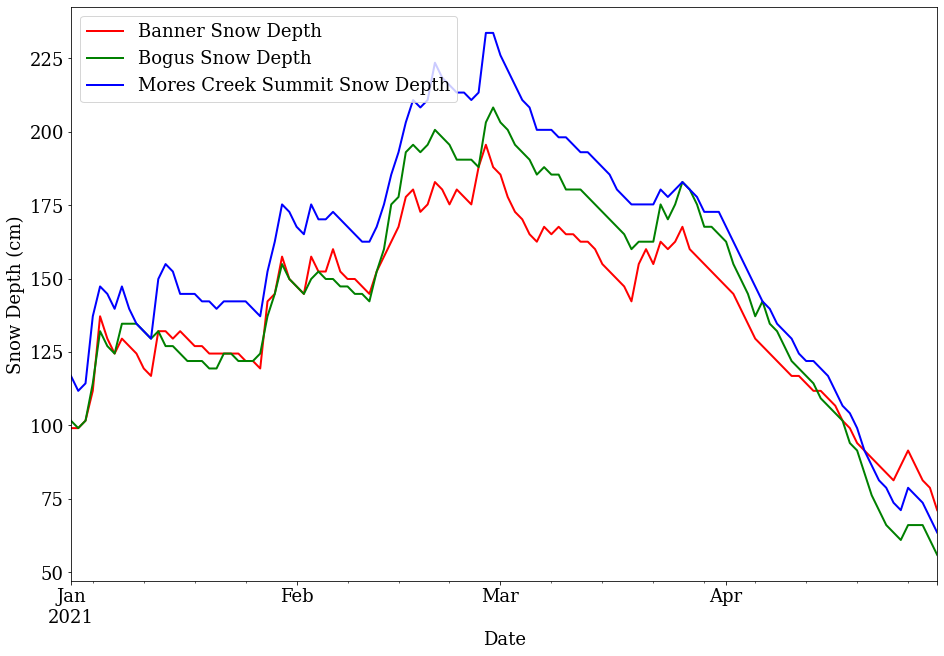

In [70]:
# Set font size and font family
plt.rcParams.update({'font.size': 18})
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

#create a figure and axes elements
fig, ax = plt.subplots(figsize=(13,9), constrained_layout=True)

snotel_data.plot(ax=ax, y='Banner_SD (cm)', color='red', linewidth=2, label='Banner Snow Depth')
snotel_data.plot(ax=ax, y='Bogus_SD (cm)', color='green', linewidth=2, label='Bogus Snow Depth')
snotel_data.plot(ax=ax, y='MCS_SD (cm)', color='blue', linewidth=2, label='Mores Creek Summit Snow Depth')

ax.set_ylabel('Snow Depth (cm)')
ax.set_xlabel('Date')
ax.legend(loc='upper left')


plt.show()

# #save the figure
# fig.savefig('Monthly_Mean_SWE.jpeg', dpi=500)

In [71]:
#find the snotel data at the beginning of uavsar to use as the base value for the uavsar timeseries
snotel_data.loc['2021-01-15']

Banner_SD (cm)    129.54
Bogus_SD (cm)     127.00
MCS_SD (cm)       152.40
Name: 2021-01-15 00:00:00, dtype: float64

In [72]:
#Create a dataframe of start and end dates for each interferograms

int_dates = [[1, '01-01-2021', '01-15-2021', 129.54, 127.0, 152.4],
            [2, '01-15-2021', '01-20-2021', -6.169, 1.667, -3.383], 
            [3, '01-20-2021', '01-27-2021', 1.515, -3.325, 1.687], 
            [4, '01-27-2021', '02-03-2021', 12.080, 10.637, 9.507],
            [5, '02-03-2021', '02-10-2021', 10.248, 10.393, 2.608],
            [6, '02-10-2021', '03-03-2021', np.nan, np.nan, np.nan], 
            [7, '03-03-2021', '03-10-2021', 4.536,2.094, 1.915],
            [8, '03-10-2021', '03-16-2021', 3.134, 1.067,4.334], 
            [9, '03-16-2021', '03-22-2021', np.nan, -0.296, -6.845]]

uavsar_SD_df = pd.DataFrame(int_dates, columns= ['inteferograms', 'start_date', 'end_date', 'SnowDepth_Banner', 'SnowDepth_Bogus', 'SnowDepth_MCS']).set_index('end_date')

uavsar_SD_df

,inteferograms,start_date,SnowDepth_Banner,SnowDepth_Bogus,SnowDepth_MCS
end_date,,,,,
01-15-2021,1,01-01-2021,129.540,127.000,152.400
01-20-2021,2,01-15-2021,-6.169,1.667,-3.383
01-27-2021,3,01-20-2021,1.515,-3.325,1.687
02-03-2021,4,01-27-2021,12.080,10.637,9.507
02-10-2021,5,02-03-2021,10.248,10.393,2.608
03-03-2021,6,02-10-2021,NaN,NaN,NaN
03-10-2021,7,03-03-2021,4.536,2.094,1.915
03-16-2021,8,03-10-2021,3.134,1.067,4.334
03-22-2021,9,03-16-2021,NaN,-0.296,-6.845


In [73]:
# Break the dataframe into two with the beginning of the second beginning at interferogram with large baseline(consistent NaN) (03-03-2021) 
uavsar_SD_df_dry = uavsar_SD_df['01-15-2021':'02-10-2021']
#set the index to datetime format
uavsar_SD_df_dry.index = pd.to_datetime(uavsar_SD_df_dry.index)

uavsar_SD_df_wet = uavsar_SD_df['03-03-2021':'03-22-2021']
#set the index to datetime format
uavsar_SD_df_wet.index = pd.to_datetime(uavsar_SD_df_wet.index)

In [74]:
#create a cum sum of snow depth
uavsar_SD_df_dry.loc[:,'SnowDepth_Banner_cumsum'] = uavsar_SD_df_dry.loc[:, 'SnowDepth_Banner'].cumsum()
uavsar_SD_df_dry.loc[:,'SnowDepth_Bogus_cumsum'] = uavsar_SD_df_dry.loc[:,'SnowDepth_Bogus'].cumsum()
uavsar_SD_df_dry.loc[:,'SnowDepth_MCS_cumsum'] = uavsar_SD_df_dry.loc[:,'SnowDepth_MCS'].cumsum()

uavsar_SD_df_dry

/tmp/ipykernel_58674/3938119463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uavsar_SD_df_dry.loc[:,'SnowDepth_Banner_cumsum'] = uavsar_SD_df_dry.loc[:, 'SnowDepth_Banner'].cumsum()
/tmp/ipykernel_58674/3938119463.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uavsar_SD_df_dry.loc[:,'SnowDepth_Bogus_cumsum'] = uavsar_SD_df_dry.loc[:,'SnowDepth_Bogus'].cumsum()
/tmp/ipykernel_58674/3938119463.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

,inteferograms,start_date,SnowDepth_Banner,SnowDepth_Bogus,SnowDepth_MCS,SnowDepth_Banner_cumsum,SnowDepth_Bogus_cumsum,SnowDepth_MCS_cumsum
end_date,,,,,,,,
2021-01-15,1,01-01-2021,129.540,127.000,152.400,129.540,127.000,152.400
2021-01-20,2,01-15-2021,-6.169,1.667,-3.383,123.371,128.667,149.017
2021-01-27,3,01-20-2021,1.515,-3.325,1.687,124.886,125.342,150.704
2021-02-03,4,01-27-2021,12.080,10.637,9.507,136.966,135.979,160.211
2021-02-10,5,02-03-2021,10.248,10.393,2.608,147.214,146.372,162.819


In [75]:
#Get snotel value at the date with no interferogram (NAN)for wet snow
snotel_data.loc['2021-03-03']


Banner_SD (cm)    172.72
Bogus_SD (cm)     195.58
MCS_SD (cm)       215.90
Name: 2021-03-03 00:00:00, dtype: float64

In [76]:
#Replace the nan with snotel value at that date

uavsar_SD_df_wet.loc['03-03-2021', 'SnowDepth_Banner'] = snotel_data.loc['2021-03-03', 'Banner_SD (cm)']
uavsar_SD_df_wet.loc['03-03-2021', 'SnowDepth_Bogus'] = snotel_data.loc['2021-03-03', 'Bogus_SD (cm)']
uavsar_SD_df_wet.loc['03-03-2021', 'SnowDepth_MCS'] = snotel_data.loc['2021-03-03', 'MCS_SD (cm)']
uavsar_SD_df_wet

,inteferograms,start_date,SnowDepth_Banner,SnowDepth_Bogus,SnowDepth_MCS
end_date,,,,,
2021-03-03,6,02-10-2021,172.720,195.580,215.900
2021-03-10,7,03-03-2021,4.536,2.094,1.915
2021-03-16,8,03-10-2021,3.134,1.067,4.334
2021-03-22,9,03-16-2021,NaN,-0.296,-6.845


In [77]:
#create a cum sum of snow depth
uavsar_SD_df_wet['SnowDepth_Banner_cumsum'] = uavsar_SD_df_wet['SnowDepth_Banner'].cumsum()
uavsar_SD_df_wet['SnowDepth_Bogus_cumsum'] = uavsar_SD_df_wet['SnowDepth_Bogus'].cumsum()
uavsar_SD_df_wet['SnowDepth_MCS_cumsum'] = uavsar_SD_df_wet['SnowDepth_MCS'].cumsum()
uavsar_SD_df_wet


/tmp/ipykernel_58674/1255372913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uavsar_SD_df_wet['SnowDepth_Banner_cumsum'] = uavsar_SD_df_wet['SnowDepth_Banner'].cumsum()
/tmp/ipykernel_58674/1255372913.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uavsar_SD_df_wet['SnowDepth_Bogus_cumsum'] = uavsar_SD_df_wet['SnowDepth_Bogus'].cumsum()
/tmp/ipykernel_58674/1255372913.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

,inteferograms,start_date,SnowDepth_Banner,SnowDepth_Bogus,SnowDepth_MCS,SnowDepth_Banner_cumsum,SnowDepth_Bogus_cumsum,SnowDepth_MCS_cumsum
end_date,,,,,,,,
2021-03-03,6,02-10-2021,172.720,195.580,215.900,172.720,195.580,215.900
2021-03-10,7,03-03-2021,4.536,2.094,1.915,177.256,197.674,217.815
2021-03-16,8,03-10-2021,3.134,1.067,4.334,180.390,198.741,222.149
2021-03-22,9,03-16-2021,NaN,-0.296,-6.845,NaN,198.445,215.304


In [78]:
#concat the two dataframes(dry and wet)
uavsar_SD_df_conc = pd.concat([uavsar_SD_df_dry, uavsar_SD_df_wet])

In [79]:
uavsar_SD_df.columns

Index(['inteferograms', 'start_date', 'SnowDepth_Banner', 'SnowDepth_Bogus',
       'SnowDepth_MCS'],
      dtype='object')

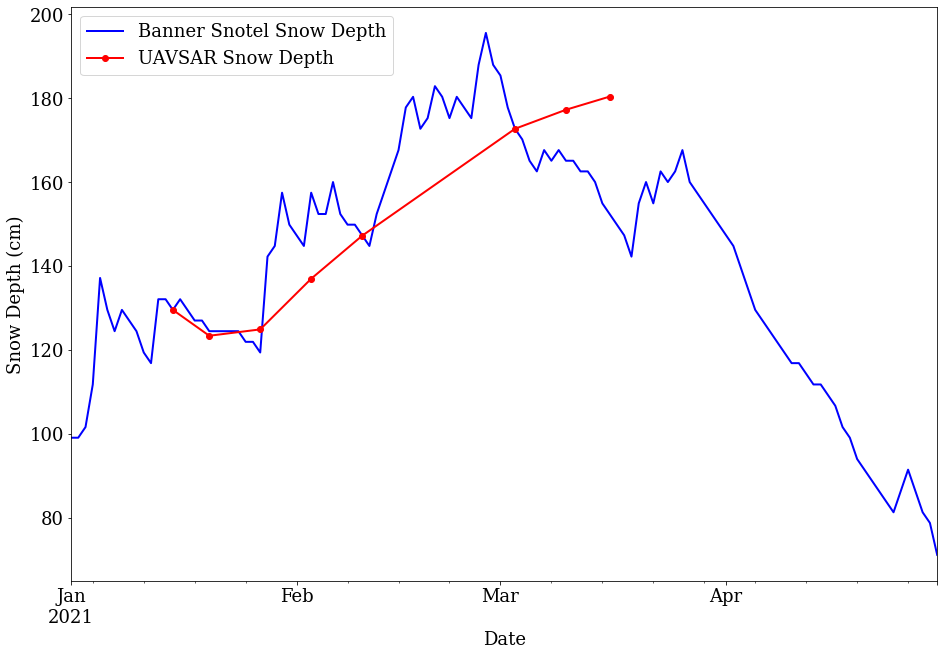

In [80]:
#create a figure and axes elements
fig, ax = plt.subplots(figsize=(13,9), constrained_layout=True)

#plot snowtel data and uavsar data
snotel_data.plot(ax=ax, y='Banner_SD (cm)', color='blue', linewidth=2, label='Banner Snotel Snow Depth')
uavsar_SD_df_conc['SnowDepth_Banner_cumsum'].plot(ax=ax, color='red', linewidth=2, label='UAVSAR Snow Depth', marker='o')

#change tick location
# ax.yaxis.set_major_locator(plt.MaxNLocator(13))
# ax.yaxis.set_major_locator(plt.MultipleLocator(10))



ax.set_ylabel('Snow Depth (cm)')
ax.set_xlabel('Date')
ax.legend(loc='upper left')


plt.show()

# #save the figure
# fig.savefig('UAVSAR-snotel-lidar2.jpeg', dpi=500)

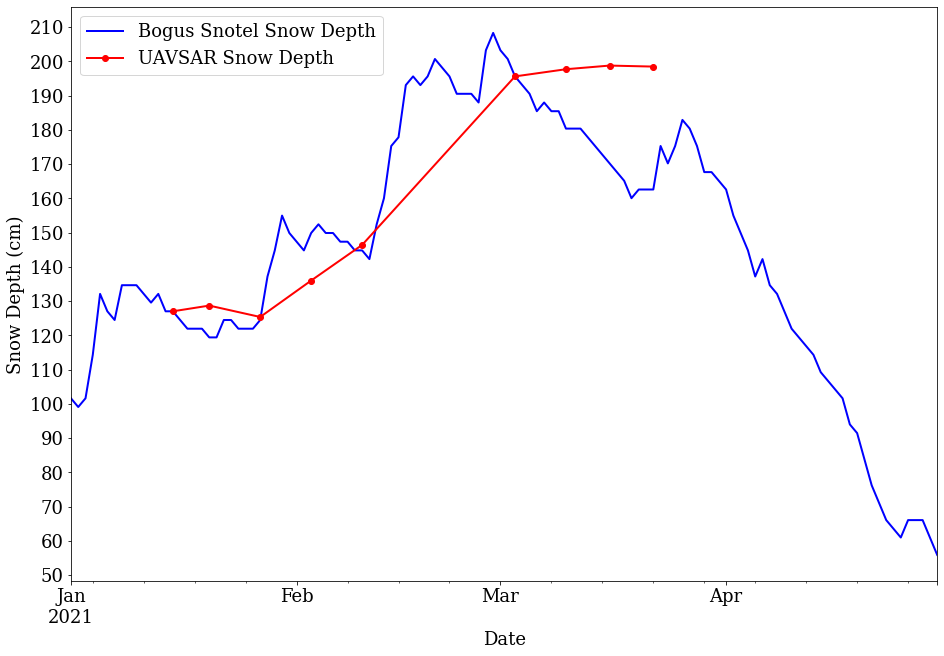

In [81]:
#create a figure and axes elements
fig, ax = plt.subplots(figsize=(13,9), constrained_layout=True)

#plot snowtel data and uavsar data
snotel_data.plot(ax=ax, y='Bogus_SD (cm)', color='blue', linewidth=2, label='Bogus Snotel Snow Depth')
uavsar_SD_df_conc['SnowDepth_Bogus_cumsum'].plot(ax=ax, color='red', linewidth=2, label='UAVSAR Snow Depth', marker='o')


#change tick location
# ax.yaxis.set_major_locator(plt.MaxNLocator(13))
ax.yaxis.set_major_locator(plt.MultipleLocator(10))



ax.set_ylabel('Snow Depth (cm)')
ax.set_xlabel('Date')
ax.legend(loc='upper left')


plt.show()

# #save the figure
# fig.savefig('UAVSAR-snotel-lidar2.jpeg', dpi=500)

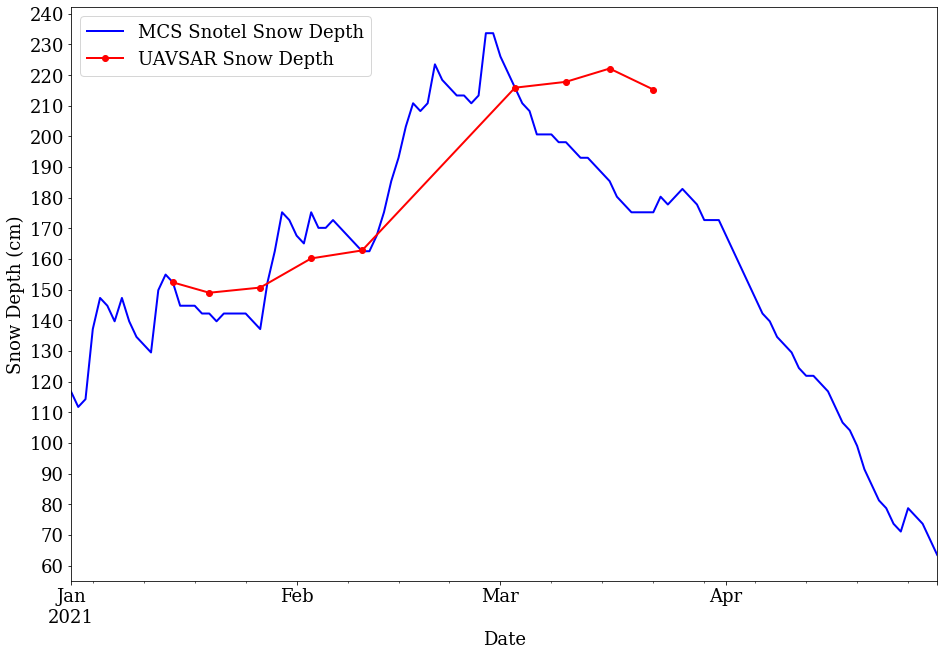

In [82]:
#create a figure and axes elements
fig, ax = plt.subplots(figsize=(13,9), constrained_layout=True)

#plot snowtel data and uavsar data
snotel_data.plot(ax=ax, y='MCS_SD (cm)', color='blue', linewidth=2, label='MCS Snotel Snow Depth')
uavsar_SD_df_conc['SnowDepth_MCS_cumsum'].plot(ax=ax, color='red', linewidth=2, label='UAVSAR Snow Depth', marker='o')


#change tick location
# ax.yaxis.set_major_locator(plt.MaxNLocator(13))
ax.yaxis.set_major_locator(plt.MultipleLocator(10))



ax.set_ylabel('Snow Depth (cm)')
ax.set_xlabel('Date')
ax.legend(loc='upper left')


plt.show()

# #save the figure
# fig.savefig('UAVSAR-snotel-lidar2.jpeg', dpi=500)